In [ ]:
Для построения классификатора используйте заранее сгенерированные обучающие и тестовые
выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt. Найдите оптимальное значение k,
обеспечивающее наименьшую ошибку классификации. Посмотрите, как выглядят данные на
графике, используя функцию

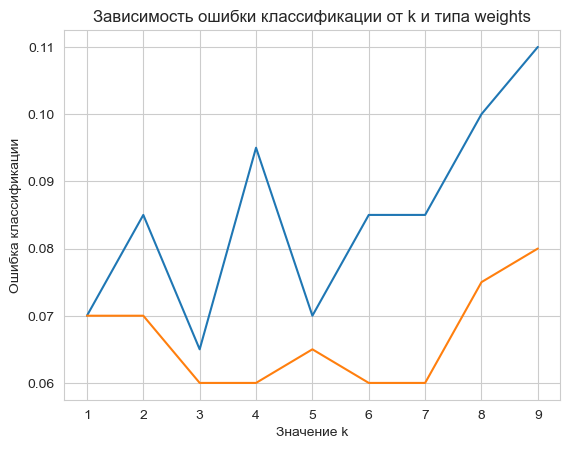

Text(0, 0.5, 'X2')

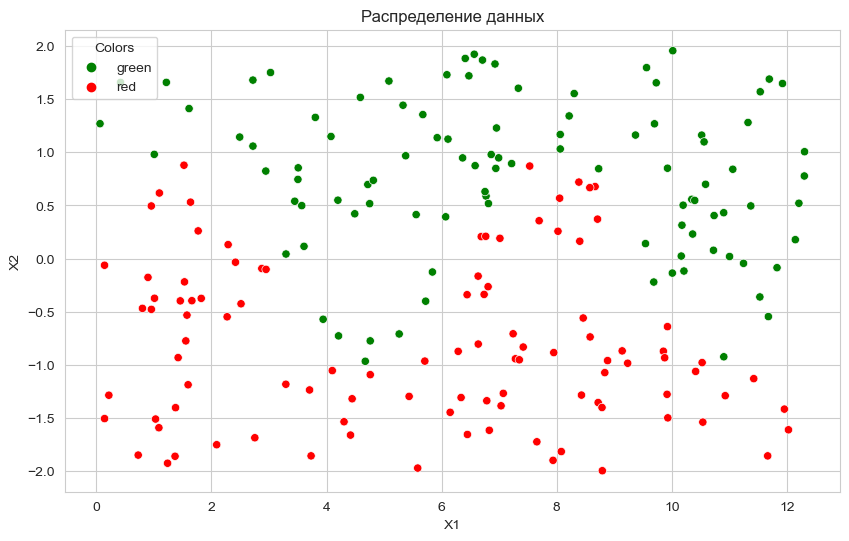

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Загрузка данных из файла
data = pd.read_csv('svmdata4.txt', delimiter='\t')

# Разделение данных на признаки и целевую переменную
X_train = data[['X1', 'X2']]
y_train = data['Colors']

# Загрузка данных из файла
data = pd.read_csv('svmdata4test.txt', delimiter='\t')

# Разделение данных на признаки и целевую переменную
X_test = data[['X1', 'X2']]
y_test = data['Colors']

# Список значений k, которые мы хотим исследовать
k_values = range(1, 10)

# Список типов весов, которые мы хотим исследовать
weight_types = ['uniform', 'distance']

# Словарь для хранения результатов
results = {'uniform': [], 'distance': []}

for weight_type in weight_types:
    for k in k_values:
        # Создание модели k-NN с заданным значением k и типом весов
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight_type)
        
        # Обучение модели
        knn.fit(X_train, y_train)
        
        # Предсказание классов на тестовой выборке
        y_pred = knn.predict(X_test)
        
        # Вычисление ошибки классификации и сохранение ее в результаты
        error = 1 - knn.score(X_test, y_test)
        results[weight_type].append(error)

# Построение графиков
for weight_type in weight_types:
    plt.plot(k_values, results[weight_type], label=f'weights={weight_type}')

plt.xlabel('Значение k')
plt.ylabel('Ошибка классификации')
plt.title('Зависимость ошибки классификации от k и типа weights')
plt.legend()
plt.show()

# Визуализация данных
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X2', hue='Colors', data=data, palette={"green": "g", "red": "r"})
plt.title('Распределение данных')
plt.xlabel('X1')
plt.ylabel('X2')

